# Computational Category Theoretic Rewriting 
## Kris Brown, Evan Patterson, Tyler Hanks, and James Fairbanks
This notebook accompanies the above paper, showing the code behind the scenes for each of the main figures.
We start with imports. This relies on new features in Catlab that have not yet been merged into the main branch, so it is important to set one's Catlab version to [here](https://github.com/kris-brown/Catlab.jl/tree/distgraph)

In [1]:
using Revise, Catlab.CategoricalAlgebra, Catlab.Graphs, Catlab.Present, Catlab.Graphics, Catlab.Theories
import Catlab
import Catlab.CategoricalAlgebra.CatElements
using Catlab.CategoricalAlgebra.FinCats: FinCatGraphEq
using CombinatorialSpaces
pres = Catlab.CategoricalAlgebra.CatElements.presentation; # abbreviate long name

┌ Info: Precompiling Catlab [134e5e36-593f-5add-ad60-77f754baafbe]
└ @ Base loading.jl:1423
┌ Info: Precompiling CombinatorialSpaces [b1c52339-7909-45ad-8b6a-6e388f7c67f2]
└ @ Base loading.jl:1423


## Figure of Section 2.1
An unlabled figure shows an example graph in Catlab. This code can generate a similar figure:

In [2]:
G = @acset Graph begin 
    V=3; E=3; 
    src=[1,2,2]; 
    tgt=[2,3,3] 
end
to_graphviz(G; node_labels=true)

## Figure 2 
The declaration of a new $\mathcal{C}$-set schema and an example instance of that schema.

In [3]:
@present ThSemisimplicialSet(FreeSchema) begin
  (V,E,T) :: Ob
  (d1,d2,d3)::Hom(T,E)
  (src,tgt) :: Hom(E,V)
  compose(d1, src) == compose(d2, src)
  compose(d1, tgt) == compose(d3, tgt)
  compose(d2, tgt) == compose(d3, src)
end
@acset_type SSet(ThSemisimplicialSet)

quadrangle = @acset SSet begin 
    T=2; E=5; V=4
    d1=[1,4]
    d2=[2,3]
    d3=[5,5]
    src=[1,1,2,2,3]
    tgt=[4,3,3,4,4]
end 

SSet with elements V = 1:4, E = 1:5, T = 1:2
┌───┬─────┬─────┐
│ E │ src │ tgt │
├───┼─────┼─────┤
│ 1 │   1 │   4 │
│ 2 │   1 │   3 │
│ 3 │   2 │   3 │
│ 4 │   2 │   4 │
│ 5 │   3 │   4 │
└───┴─────┴─────┘
┌───┬────┬────┬────┐
│ T │ d1 │ d2 │ d3 │
├───┼────┼────┼────┤
│ 1 │  1 │  2 │  5 │
│ 2 │  4 │  3 │  5 │
└───┴────┴────┴────┘

## Figure 3a 
Catlab has functionality to reversibly translate between a $\mathcal{C}$-set and its category-of-elements representation (which is a $\mathcal{C}$-typed-graph).

In [4]:
elements(quadrangle)

El,πₑ
1,1
2,1
3,1
4,1
5,2
6,2
7,2
8,2
9,2
10,3


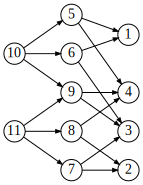

In [5]:
to_graphviz(FreeDiagram(pres(elements(quadrangle))[1]), node_labels=true)

## Figure 4
We show a sequence of building schema `N+1` by choosing a designated instance of schema `N` and treating it as a type system.

In [6]:
G2 = @acset Graph begin V=2; E=2; src=[1,2]; tgt=[2,1] end 
ThPetri = pres(elements(G2))[1]
@acset_type Petri(ThPetri)
Interact = @acset Petri begin 
    V_1=2; V_2=3; E_1=4; E_2=4
    src_E_1 = [1,1,2,2]
    tgt_E_1 = [1,2,2,3]
    src_E_2 = [1,2,2,3]
    tgt_E_2 = [1,1,2,2]
end
ThHV = pres(elements(Interact))[1]
@acset_type HV(ThHV)    
# etc.

HV

## Figure 5
We execute the following code to benchmark the two representations of $\mathcal{C}$-sets.

In [7]:
# INSERT BENCHMARK CODE HERE 

## Figure 6
A single quadralateral edge flip with DPO rewriting. We first set up the objects involved in the rules and the object we will rewrite:

In [8]:
L = quadrangle  # We defined quadrilateral above.
I = @acset SSet begin
  E=4; V=4
  src=[1,1,2,2]
  tgt=[3,4,3,4]
end
R = @acset SSet begin
  T=2; E=5; V=4
  d1=[2,1]
  d2=[3,3]
  d3=[4,5]
  src=[1,1,1,2,2]
  tgt=[3,4,2,4,3]
end
# construct G via pushout: glue two quads by a common edge
edge = @acset SSet begin E=1; V=2; src=[1]; tgt=[2] end 
edge_quad = homomorphism(edge, L; initial=Dict([:V=>[1,4]]))
G = apex(pushout(edge_quad, edge_quad)) 

SSet with elements V = 1:6, E = 1:9, T = 1:4
┌───┬─────┬─────┐
│ E │ src │ tgt │
├───┼─────┼─────┤
│ 1 │   1 │   4 │
│ 2 │   1 │   3 │
│ 3 │   2 │   3 │
│ 4 │   2 │   4 │
│ 5 │   3 │   4 │
│ 6 │   1 │   6 │
│ 7 │   5 │   6 │
│ 8 │   5 │   4 │
│ 9 │   6 │   4 │
└───┴─────┴─────┘
┌───┬────┬────┬────┐
│ T │ d1 │ d2 │ d3 │
├───┼────┼────┼────┤
│ 1 │  1 │  2 │  5 │
│ 2 │  4 │  3 │  5 │
│ 3 │  1 │  6 │  9 │
│ 4 │  8 │  7 │  9 │
└───┴────┴────┴────┘

Partially specify homomorphisms and let automated search handle the rest to generate the morphisms used in DPO.

In [9]:
r = homomorphism(I, R; monic=true)
l = homomorphism(I, L; monic=true)
# Perform rewrite 
rewrite(l, r, G; monic=true) # homomorphism search will find a match, if any

SSet with elements V = 1:6, E = 1:9, T = 1:4
┌───┬─────┬─────┐
│ E │ src │ tgt │
├───┼─────┼─────┤
│ 1 │   1 │   3 │
│ 2 │   1 │   4 │
│ 3 │   1 │   2 │
│ 4 │   2 │   4 │
│ 5 │   2 │   3 │
│ 6 │   1 │   6 │
│ 7 │   5 │   6 │
│ 8 │   5 │   4 │
│ 9 │   6 │   4 │
└───┴─────┴─────┘
┌───┬────┬────┬────┐
│ T │ d1 │ d2 │ d3 │
├───┼────┼────┼────┤
│ 1 │  2 │  3 │  4 │
│ 2 │  1 │  3 │  5 │
│ 3 │  2 │  6 │  9 │
│ 4 │  8 │  7 │  9 │
└───┴────┴────┴────┘

## Figure 7
Demonstrating single-pushout rewriting with implicit deletion.

In [18]:
L = @acset SSet begin 
    T=1; E=3; V=3; 
    d1=[1]; d2=[2]; d3=[3]; 
    src=[1,1,2]; tgt=[3,2,3] 
end
l = homomorphism(edge, L)
r = id(edge)
m = homomorphism(L, quadrangle)
!can_pushout_complement(l, m) || error("Check that this does not make sense for DPO")
single_pushout_rewrite(l,r,m)

E,src,tgt
1,1,3
2,2,3


## Figure 8
Demonstrating sesqui-pushout rewriting with implicit copying.

In [11]:
G = @acset SSet begin
  T=1;E=3;V=3;src=[1,1,2];tgt=[3,2,3];d1=[1];d2=[2];d3=[3] 
end
L = @acset SSet begin V=1 end
I = @acset SSet begin V=2 end
l = homomorphism(I,L); 
r=id(I); 
m = CSetTransformation(L, G, V=[1]);

nparts(sesqui_pushout_rewrite(l, r, m), :T)==4 || error("We get 4 'triangles' when we ignore equations")
resSqPO= sesqui_pushout_rewrite(l, r, m; pres=ThSemisimplicialSet)


SSet with elements V = 1:4, E = 1:5, T = 1:2
┌───┬─────┬─────┐
│ E │ src │ tgt │
├───┼─────┼─────┤
│ 1 │   1 │   4 │
│ 2 │   2 │   4 │
│ 3 │   1 │   3 │
│ 4 │   2 │   3 │
│ 5 │   3 │   4 │
└───┴─────┴─────┘
┌───┬────┬────┬────┐
│ T │ d1 │ d2 │ d3 │
├───┼────┼────┼────┤
│ 1 │  1 │  3 │  5 │
│ 2 │  2 │  4 │  5 │
└───┴────┴────┴────┘

## Figure 9
We show rewriting in slice categories

## Figure 10
We show the process behind computing DPO on structured cospans. Our pattern will look for a vertex that is both an input and an output, and the rewrite will add a self-loop to this vertex.

In [ ]:
const OpenGraphOb, OpenGraph = OpenCSetTypes(Graph, :V)

L = OpenGraph(Graph(1), FinFunction([1]), FinFunction([1]))
loop = @acset Graph begin V=1; E=1; src=[1]; tgt=[1] end
R = OpenGraph(loop, FinFunction([1]), FinFunction([1]))
l = id(L)
r = 

## Figure 11
We show the construction of a cube surface as a distributed semi-simplicial set. Start by defining the category of distributed Semisimplicial Sets as a special kind of diagram


In [12]:
const ACSetCat{S} = TypeCat{S, ACSetTransformation}
const DistACSet{S,D} = Diagram{id, ACSetCat{S}, D}
const DistACSetHom{S, F,Φ,D} = DiagramHom{id, ACSetCat{S},F,Φ,D}

const DistSSet{D} = DistACSet{ACSetCat{SSet}, D}
const DistSSetHom{F,Φ,D} = DistACSetHom{ACSetCat{SSet},F,Φ,D}

DiagramHom{Catlab.Theories.id, TypeCat{TypeCat{SSet, ACSetTransformation}, ACSetTransformation}, F, Φ, D} where {F, Φ, D}

We then specify the data of the network graph and declare its path to commute. 

In [13]:
""" Helper fn: category generated by a finite graph where all paths commute."""
function CommutingGraph(g::HasGraph)
  pths = vcat([zip(ps, ps[2:end]) for ps in values(enumerate_paths(g))
              if length(ps) > 1]...)
  FinCatGraphEq(g, ((x,y)->x=>y).(pths)) # all possible equations
end

d = @acset Graph begin 
    V=6+12;  # faces, edges ... numbering comes from reading figure top to bottom, left to right
    E=24; # each face glued along four edges
    src=[2,2,3,3, 5,5, 6,6, 7,7, 8,8, 9,9, 11,11,13,13,15,15,16,16,17,17]
    tgt=[1,4,1,10,1,14,4,10,4,12,4,14,1,18,10,12,12,14,10,18,12,18,14,18]
end;
to_graphviz(d, node_labels=true);

D = CommutingGraph(d)

FinCat(Graph:
  V = 1:18
  E = 1:24
  src : E → V = [2, 2, 3, 3, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 11, 11, 13, 13, 15, 15, 16, 16, 17, 17]
  tgt : E → V = [1, 4, 1, 10, 1, 14, 4, 10, 4, 12, 4, 14, 1, 18, 10, 12, 12, 14, 10, 18, 12, 18, 14, 18], [])

Lastly, we construct the functor into the category of semisimplicial complexes


In [14]:

# SSets corresponding to the vertices
obs = vcat(repeat([quadrangle], 6), repeat([edge], 12))

# Use homomorphism finder to get all of the relevant morphisms
purple, red, green, teal, _ = homomorphisms(edge, quadrangle) # TODO: actually get this right

# SSet morphisms corresponding to the edges of the diagram
homs = [green, green,  # E2
        red, green,    # E3
        teal, green,   # E5
        teal, red,     # E6
        purple, green, # E7
        red, teal,     # E8
        purple, green, # E9
        purple, red,   # E11
        teal, purple,  # E13
        teal, red,     # E15
        purple, purple,# E16
        red, teal]     # E17
J = Diagram(FinDomFunctor(obs, homs, D)); 